### What is the relationship between annual leave taken and bonus?

c:\Users\ayah\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   BusinessEntityID              JobTitle   BirthDate MaritalStatus Gender  \
0               275  Sales Representative  1968-12-25             S      M   
1               284  Sales Representative  1978-01-05             M      M   
2               286  Sales Representative  1977-02-14             S      F   
3               289  Sales Representative  1968-03-17             M      F   
4               290  Sales Representative  1975-09-30             S      M   

     HireDate  SalariedFlag  VacationHours  SickLeaveHours  TerritoryID  \
0  2011-05-31          True             38              39          2.0   
1  2012-09-30          True             39              39          1.0   
2  2013-05-30          True             36              38          9.0   
3  2012-05-30          True             37              38         10.0   
4  2012-05-30          True             34              37          7.0   

   SalesQuota   Bonus  CommissionPct      SalesYTD  SalesLastYear  
0    300000.

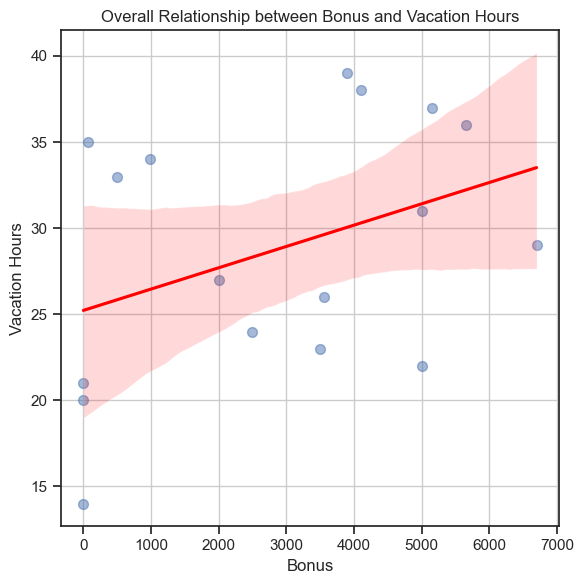

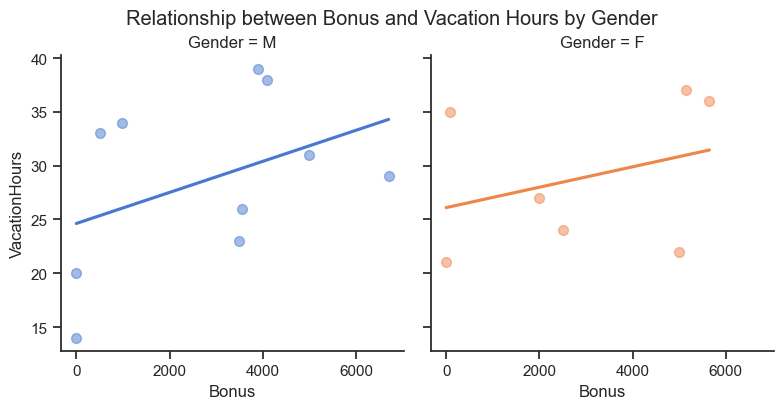

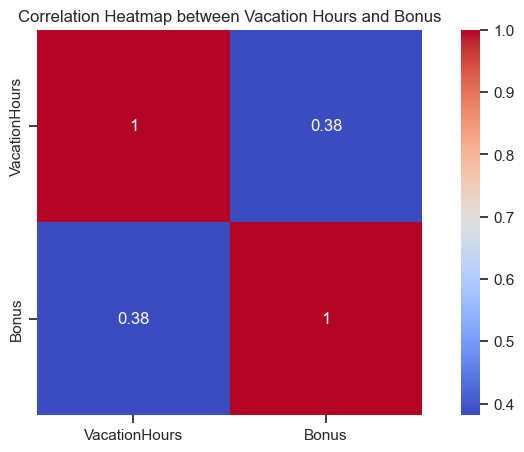

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

# Establish a database connection
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=********\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
)

# Define the SQL query
sql_query = """
SELECT TOP (1000) sp.[BusinessEntityID],
      [JobTitle],
      [BirthDate],
      [MaritalStatus],
      [Gender],
      [HireDate],
      [SalariedFlag],
      [VacationHours],
      [SickLeaveHours],
      [TerritoryID],
      [SalesQuota],
      [Bonus],
      [CommissionPct],
      [SalesYTD],
      [SalesLastYear]
  FROM [AdventureWorks2022].[HumanResources].[Employee] e
  JOIN [Sales].[SalesPerson] sp ON sp.BusinessEntityID = e.BusinessEntityID
  ORDER BY [SickLeaveHours] DESC
"""

# Fetch data into a pandas DataFrame
df = pd.read_sql(sql_query, conn)
print(df.head())

# Close the database connection
conn.close()

# Drop rows with missing values
df.dropna(subset=['Bonus', 'VacationHours'], inplace=True)

# Set the seaborn theme for the plots
sns.set_theme(style="ticks")

# Plotting the overall relationship using regplot
plt.figure(figsize=(6, 6))
sns.regplot(x='Bonus', y='VacationHours', data=df, scatter_kws={'alpha':0.5, 's':50}, line_kws={"color":"red"})
plt.title('Overall Relationship between Bonus and Vacation Hours')
plt.xlabel('Bonus')
plt.ylabel('Vacation Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the relationship by gender using lmplot
sns.lmplot(
    data=df, x="Bonus", y="VacationHours", col="Gender", hue="Gender",
    col_wrap=2, palette="muted", ci=None, height=4, scatter_kws={"s": 50, "alpha": 0.5}
)

plt.suptitle('Relationship between Bonus and Vacation Hours by Gender', y=1.02)
plt.show()

# Plotting a heatmap to show correlation
plt.figure(figsize=(10, 5))
sns.heatmap(df[['VacationHours', 'Bonus']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap between Vacation Hours and Bonus')
plt.show()
